In [2]:
from pickletools import optimize
from statistics import mode
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

import tushare as ts
import pandas_datareader as web

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

stock_code = '600775.SH'
ts.set_token('51fd5a77415e6299ad8243e387472a5552e3d24f5c889781caef6d89')
data = ts.pro_bar(ts_code=stock_code, adj='qfq', start_date='20120101', end_date='20211231')
data['date'] = pd.to_datetime(data['trade_date'], format = "%Y/%m/%d %H:%M:%S")
data.set_index('date', inplace=True)  # 设置索引覆盖原来的数据
data = data.sort_index(ascending=True)  # 将时间顺序升序，符合时间序列
#data = data[['high', 'low', 'open', 'close', 'vol']]
print(data)
# ['ts_code', 'open', 'high', 'low', 'close', 'pre_close', 'change', 'pct_chg', 'vol', 'amount']
"""
company = 'FB'

start = dt.datetime(2019, 1, 1)
end = dt.datetime(2019, 1, 5)
data = web.DataReader(company, 'yahoo', start, end)

print(list(data))
"""
"""
                  High         Low        Open       Close    Volume   Adj Close
Date                                                                            
2021-09-17  371.410004  361.589996  371.410004  364.720001  26299000  364.720001
2021-09-20  361.029999  349.799988  359.299988  355.700012  19822800  355.700012
2021-09-21  360.040009  355.190002  358.500000  357.480011  11751900  357.480011
"""

2022-09-19 00:51:40.591765: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


              ts_code trade_date     open     high     low    close  \
date                                                                  
2012-01-04  600775.SH   20120104   5.0497   5.1154  4.8714   4.8808   
2012-01-05  600775.SH   20120105   4.9465   4.9465  4.7494   4.7494   
2012-01-06  600775.SH   20120106   4.7681   4.7963  4.6555   4.7681   
2012-01-09  600775.SH   20120109   4.7775   5.0779  4.7306   5.0028   
2012-01-10  600775.SH   20120110   4.9840   5.2468  4.9746   5.2187   
...               ...        ...      ...      ...     ...      ...   
2021-12-27  600775.SH   20211227   9.5700   9.9700  9.5000   9.8000   
2021-12-28  600775.SH   20211228   9.8000  10.4800  9.6800  10.3000   
2021-12-29  600775.SH   20211229  10.1500  10.2500  9.7200   9.9700   
2021-12-30  600775.SH   20211230   9.8000   9.8900  9.6400   9.7900   
2021-12-31  600775.SH   20211231   9.8000  10.1500  9.7100   9.9500   

            pre_close  change  pct_chg        vol      amount  
date        

'\n                  High         Low        Open       Close    Volume   Adj Close\nDate                                                                            \n2021-09-17  371.410004  361.589996  371.410004  364.720001  26299000  364.720001\n2021-09-20  361.029999  349.799988  359.299988  355.700012  19822800  355.700012\n2021-09-21  360.040009  355.190002  358.500000  357.480011  11751900  357.480011\n'

In [7]:
# prepare data
# scale down the 
scaler = MinMaxScaler(feature_range=(0,1))
before_scale = data['close'].values.reshape(-1, 1)
#print(before_scale)
scaled_data = scaler.fit_transform(before_scale)

prediction_days = 60
#print(scaled_data)

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days: x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train)

[[0.0197367  0.01423988 0.01502215 ... 0.05271767 0.0542864  0.05703481]
 [0.01423988 0.01502215 0.0248403  ... 0.0542864  0.05703481 0.05782127]
 [0.01502215 0.0248403  0.033872   ... 0.05703481 0.05782127 0.06449778]
 ...
 [0.09207394 0.09876719 0.10922538 ... 0.23346873 0.2255205  0.24643689]
 [0.09876719 0.10922538 0.11340866 ... 0.2255205  0.24643689 0.23263208]
 [0.10922538 0.11340866 0.11382699 ... 0.24643689 0.23263208 0.22510218]]
[[[0.0197367 ]
  [0.01423988]
  [0.01502215]
  ...
  [0.05271767]
  [0.0542864 ]
  [0.05703481]]

 [[0.01423988]
  [0.01502215]
  [0.0248403 ]
  ...
  [0.0542864 ]
  [0.05703481]
  [0.05782127]]

 [[0.01502215]
  [0.0248403 ]
  [0.033872  ]
  ...
  [0.05703481]
  [0.05782127]
  [0.06449778]]

 ...

 [[0.09207394]
  [0.09876719]
  [0.10922538]
  ...
  [0.23346873]
  [0.2255205 ]
  [0.24643689]]

 [[0.09876719]
  [0.10922538]
  [0.11340866]
  ...
  [0.2255205 ]
  [0.24643689]
  [0.23263208]]

 [[0.10922538]
  [0.11340866]
  [0.11382699]
  ...
  [0.2464

In [5]:
# build the model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

2022-09-18 15:28:15.666462: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/25
72/72 [==============================] - 7s 45ms/step - loss: 0.0082
Epoch 2/25
72/72 [==============================] - 3s 40ms/step - loss: 0.0031
Epoch 3/25
72/72 [==============================] - 3s 40ms/step - loss: 0.0027
Epoch 4/25
72/72 [==============================] - 3s 40ms/step - loss: 0.0022
Epoch 5/25
72/72 [==============================] - 3s 40ms/step - loss: 0.0018
Epoch 6/25
72/72 [==============================] - 3s 41ms/step - loss: 0.0018
Epoch 7/25
72/72 [==============================] - 3s 42ms/step - loss: 0.0019
Epoch 8/25
72/72 [==============================] - 3s 42ms/step - loss: 0.0018
Epoch 9/25
72/72 [==============================] - 3s 43ms/step - loss: 0.0016
Epoch 10/25
72/72 [==============================] - 3s 43ms/step - loss: 0.0018
Epoch 11/25
72/72 [==============================] - 3s 43ms/step - loss: 0.0014
Epoch 12/25
72/72 [==============================] - 3s 43ms/step - loss: 0.0014
Epoch 13/25
72/72 [==================

In [6]:
test_data = ts.pro_bar(ts_code=stock_code, adj='qfq', start_date='20220101')
test_data['date'] = pd.to_datetime(test_data['trade_date'], format = "%Y/%m/%d %H:%M:%S")
test_data.set_index('date', inplace=True)  # 设置索引覆盖原来的数据
test_data = test_data.sort_index(ascending=True)  # 将时间顺序升序，符合时间序列
#test_data = test_data[['high', 'low', 'open', 'close', 'vol']]
actual_prices = test_data['close']

In [7]:
total_dataset = pd.concat((data['close'], test_data['close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
print(predicted_prices)
print(type(predicted_prices))
print(actual_prices.values)
print(type(actual_prices.values))

6/6 [==============================] - 1s 13ms/step
[[10.238048 ]
 [10.222708 ]
 [10.200577 ]
 [10.206169 ]
 [10.288817 ]
 [10.372647 ]
 [10.458699 ]
 [10.529621 ]
 [10.556311 ]
 [10.684233 ]
 [10.8733225]
 [10.935327 ]
 [10.917981 ]
 [10.8207445]
 [10.6888485]
 [10.600707 ]
 [10.42535  ]
 [10.203116 ]
 [ 9.960177 ]
 [ 9.739942 ]
 [ 9.626437 ]
 [ 9.672878 ]
 [ 9.831395 ]
 [10.000101 ]
 [10.150532 ]
 [10.316082 ]
 [10.468527 ]
 [10.569496 ]
 [10.585662 ]
 [10.647621 ]
 [10.687421 ]
 [10.67199  ]
 [10.650409 ]
 [10.570284 ]
 [10.48332  ]
 [10.409413 ]
 [10.369202 ]
 [10.333525 ]
 [10.300101 ]
 [10.25986  ]
 [10.190992 ]
 [10.068985 ]
 [ 9.880512 ]
 [ 9.704534 ]
 [ 9.57955  ]
 [ 9.447359 ]
 [ 9.22105  ]
 [ 8.996425 ]
 [ 8.847957 ]
 [ 8.7802925]
 [ 8.7757435]
 [ 8.850728 ]
 [ 8.990971 ]
 [ 9.123553 ]
 [ 9.180641 ]
 [ 9.172597 ]
 [ 9.134553 ]
 [ 9.084803 ]
 [ 9.01251  ]
 [ 8.948621 ]
 [ 8.911185 ]
 [ 8.861088 ]
 [ 8.778312 ]
 [ 8.637318 ]
 [ 8.538373 ]
 [ 8.51536  ]
 [ 8.536847 ]
 [ 8.56839

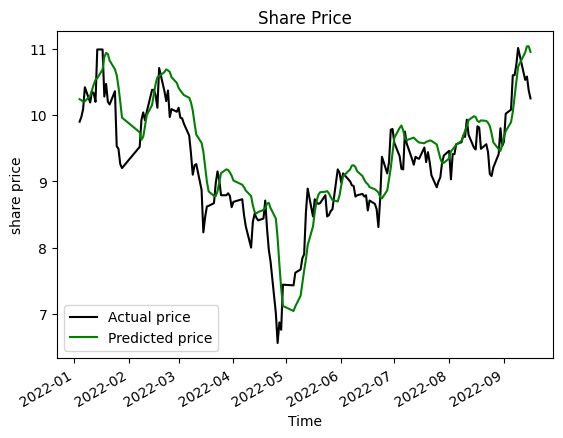

In [16]:
# create a dataframe and use the index from another dataframe
predicted_prices = pd.DataFrame(predicted_prices, index = actual_prices.index)
plt.plot(actual_prices, color='black', label=f'Actual price')
plt.plot(predicted_prices, color='green', label='Predicted price')
plt.title('Share Price')
plt.xlabel('Time')
plt.ylabel('share price')
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()